***

# <ins><font size="6"><font color='indianred'>*Sk*</font><font color='cornflowerblue'>ynthetic</font></font></ins>



### <font size="4"><font color='indianred'>sketch</font> to <font color='cornflowerblue'>seismic</font></font>
***

In [1]:
from skynthetic import skyn

In [2]:
image = skyn.upload() # one image at a time

FileUpload(value={}, description='Upload')

In [3]:
sketch = skyn.prepare(image) # if no uploaded images will break

Sketch loaded...
Building skynthetic...
Done


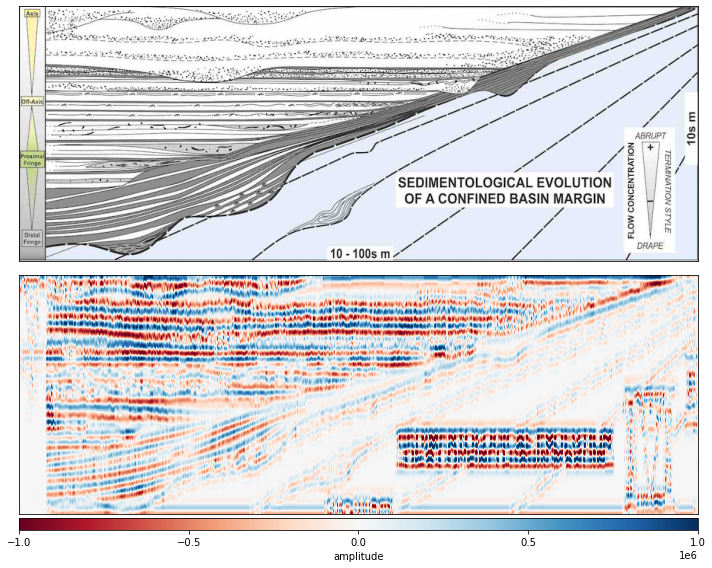

In [4]:
skyn.go(sketch, 40, -1e6, 1e6)